<Figure size 432x288 with 0 Axes>

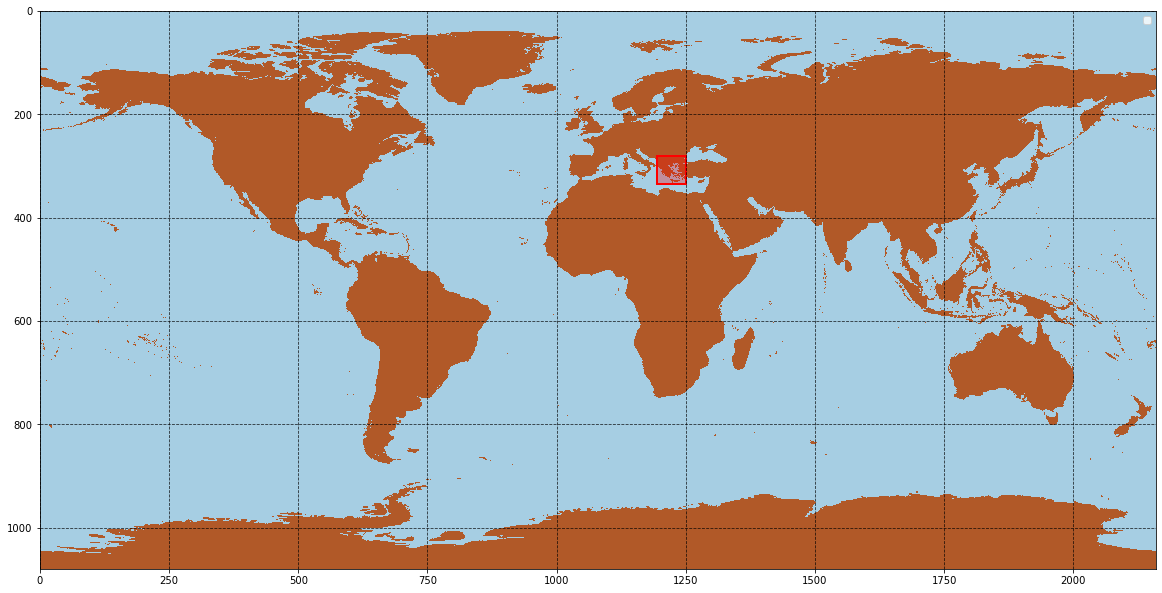

Duration: 0:00:37.128735


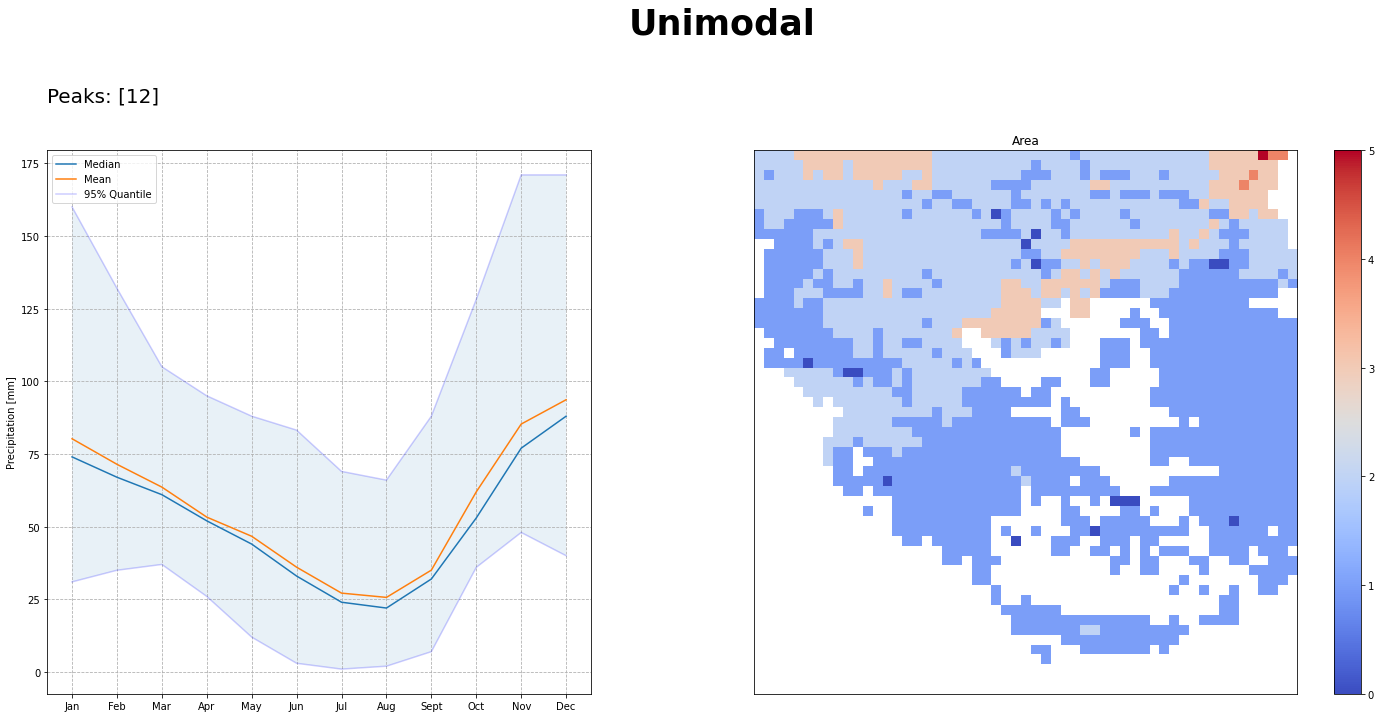

In [3]:
from datetime import datetime
start_time = datetime.now()
import rasterio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from modality import Modality
from matplotlib.patches import Rectangle

#Set the new matrices
mod = []
flats = []
peak = []
med = []
text = []
w = []

#Raster read
for im in range(1, 10):
    w1 = (rasterio.open(r'C:\Users\owner\Google Drive 2\ELGO Paper\wc2.1_10m_prec\wc2.1_10m_prec_0{}.tif'.format(im)))
    w.append(w1.read())
for im in range(10, 13):
    w1 = (rasterio.open(r'C:\Users\owner\Google Drive 2\ELGO Paper\wc2.1_10m_prec\wc2.1_10m_prec_{}.tif'.format(im)))
    w.append(w1.read())

rows = w1.shape[0]
cols = w1.shape[1]
w = np.reshape(w, (12, rows, cols))
w = w.astype("float")
w[w < 0] = np.nan

n = np.random.randint(0, rows)
m = np.random.randint(0, cols)
n = 280 #GREECE
m = 1195 #GREECE
k = 55

plt.figure()
for i in range(int(n), int(n) + k):
     for j in range(int(m), int(m) + k):
            P = (w[0][i][j], w[1][i][j], w[2][i][j], w[3][i][j], w[4][i][j], w[5][i][j], w[6][i][j], w[7][i][j], w[8][i][j], w[9][i][j], w[10][i][j], w[11][i][j])
            med.append(P)
            if w[0][i][j] >= 0:
                mod.append(sum(Modality(P)[0]))
                flats.append(Modality(P)[1])
                peak.append(Modality(P)[2])
            else:
                mod.append(np.nan)
                flats.append(np.nan)
                peak.append(np.nan)

#World
months = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec')
x = np.arange(len(months))
plt.figure(figsize = (20, 20))
mapp = w[0].astype("float")
mapp[np.isnan(mapp)] = -1
mapp[mapp >= 0] = 1
plt.imshow(mapp, cmap = 'Paired', interpolation = 'nearest')
plt.legend([(i,j)])
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((m, n), k, k, fill = None, alpha = 1, color = 'r', lw = 2))
currentAxis.add_patch(Rectangle((m, n), k, k, alpha = 0.3, color = 'r'))
plt.grid(color = 'black', ls = '--', alpha = 0.8)
plt.show();

#Stats
if not np.isnan(med).all() == True:
    median = pd.DataFrame(np.asarray(med))
    mean = np.mean(median, axis = 0)
    median = np.nanmedian(median, axis = 0)
    histogr = pd.DataFrame(np.asarray(med))
    perc25 = np.nanpercentile((np.asarray(med)), 2.5, axis = 0)
    perc975 = np.nanpercentile((np.asarray(med)), 97.5, axis = 0)
    areamod, areaflat, areapeak = Modality(np.array(median));

    if areamod.sum() == 0:
        text = 'Non-modal'
    if areamod.sum() == 1:
        text = 'Unimodal'
    if areamod.sum() == 2:
        text = 'Bimodal'
    if areamod.sum() == 3:
        text = 'Trimodal'
    if areamod.sum() > 3:
        text = 'Multimodal & rest'
    peaky = f'Peaks: {areapeak}'

    #COOL PLOT
    fig, (ax, ax2) = plt.subplots(1,2, gridspec_kw={'width_ratios': [1.5, 2]}, figsize = (25, 10))
    fig.suptitle(text, x = 0.5, y = 1.08, fontsize=35, fontweight='bold');
    ax.plot(x, median);
    ax.plot(x, mean);
    ax.set_ylabel('Precipitation [mm]');
    ax.plot(months, perc25, color = 'blue', alpha=0.2)
    ax.plot(months, perc975, color = 'blue', alpha=0.2)
    ax.fill_between(months, perc25, perc975, alpha=0.1)
    ax.legend(['Median', 'Mean', '95% Quantile'], loc = 'best');
    ax.grid(ls = '--')

    #Location
    ax2.title.set_text('Area')
    mapping = np.reshape(mod, ((k, k)))
    plt.imshow(mapping, cmap='coolwarm')
    ax2.grid()
    ax2.set_xticks([])
    ax2.set_yticks([])
    plt.colorbar(shrink=1);
    if areamod.any() > 0:
        ax2.text(0, 1.1, peaky, horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, fontsize = 20)
    if len(areaflat) > 0:
        flaty = f'Flats: {areaflat}'
        ax2.text(.5, 1.1, flaty, horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, fontsize = 20)

#Duration
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))